<a href="https://colab.research.google.com/github/neel26desai/cmpe255_assignment2/blob/main/Binary_Classification_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
Our Goal is to predict weather a tumor in the breast appears to be Malignant or Benign based features such tummor size, texture, area etc

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#reading the data
df = pd.read_csv('/content/drive/MyDrive/DM/Assignment2/PyCaretBinaryClassifiation/data.csv')

In [ ]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#using the object base api of pycaret
# import ClassificationExperiment and init the class

from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# init setup on exp, our target column is diagnosis
exp.setup(df, target = 'diagnosis', session_id = 123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 33)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,32
9,Rows with missing values,100.0%


In [ ]:
# compare baseline models
best_model = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9648,0.9940,0.9395,0.9666,0.9517,0.9241,0.9257,0.2190
et,Extra Trees Classifier,0.9647,0.9967,0.9462,0.9617,0.9521,0.9242,0.9263,0.3750
xgboost,Extreme Gradient Boosting,0.9622,0.9940,0.9595,0.9432,0.9496,0.9194,0.9216,0.1130
catboost,CatBoost Classifier,0.9622,0.9956,0.9462,0.9566,0.9489,0.9190,0.9220,0.0920
lda,Linear Discriminant Analysis,0.9599,0.9923,0.8924,1.0000,0.9412,0.9112,0.9165,0.1390
lightgbm,Light Gradient Boosting Machine,0.9598,0.9922,0.9329,0.9595,0.9448,0.9132,0.9149,0.0960
rf,Random Forest Classifier,0.9572,0.9935,0.9462,0.9469,0.9439,0.9094,0.9128,0.2090
gbc,Gradient Boosting Classifier,0.9547,0.9929,0.9390,0.9437,0.9391,0.9031,0.9059,0.2350
qda,Quadratic Discriminant Analysis,0.9546,0.9944,0.9390,0.9421,0.9390,0.9029,0.9047,0.1140
ridge,Ridge Classifier,0.9497,0.0000,0.8852,0.9788,0.9268,0.8890,0.8944,0.0640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

In [ ]:
#evaluate_model function to analyzes the performance of a trained model on the test set
exp.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

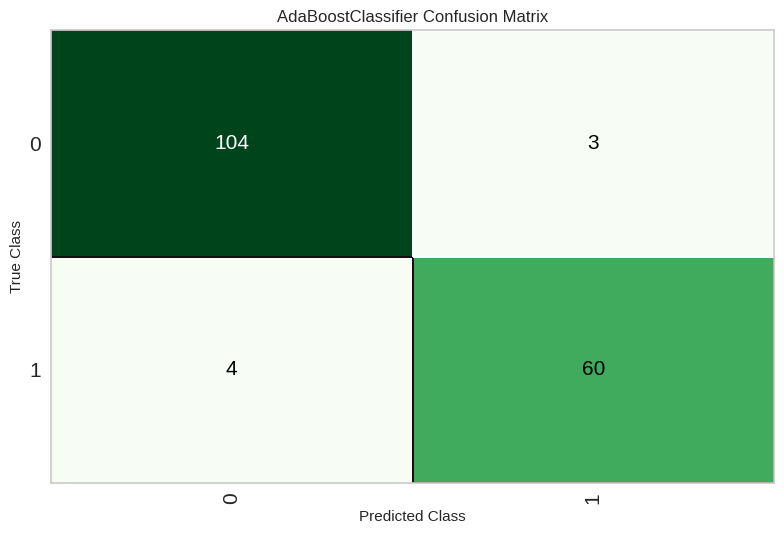

In [32]:
exp.plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
#from above, base model comaprision we found out that AdaBoost Classifier is performing the best
#now lets see if we can make the model even better by performing hyperparameter tunning on it
tuned_ada_model = exp.tune_model()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9947,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9500,0.9920,0.9333,0.9333,0.9333,0.8933,0.8933
3,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
4,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
5,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
6,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9231,0.9829,0.9286,0.8667,0.8966,0.8354,0.8367


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_ada_model

AdaBoostClassifier(algorithm='SAMME', base_estimator='deprecated',
                   estimator=None, learning_rate=0.4, n_estimators=230,
                   random_state=123)

In [ ]:
#generating an evaliation report of the model
exp.evaluate_model(tuned_ada_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

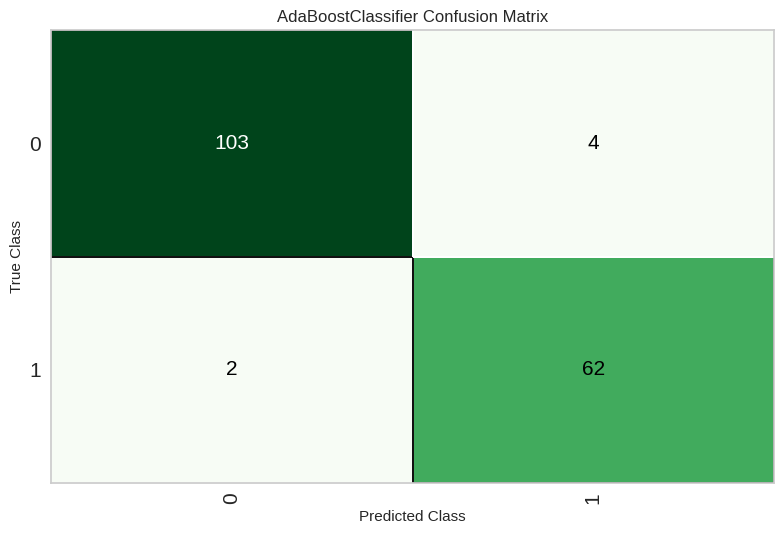

In [33]:
exp.plot_model(tuned_ada_model, plot = 'confusion_matrix')

In [ ]:
#using both models to predict on the test set created during set up

In [ ]:
base=exp.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9591,0.9835,0.9375,0.9524,0.9449,0.9123,0.9124


In [ ]:
tuned=exp.predict_model(tuned_ada_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9649,0.9905,0.9688,0.9394,0.9538,0.9256,0.9258


From the above comparission we can see that after the hyperparameter tunning our model performs even betterwe increased our true positives asn wells reduced our Flase negative. Our accuracy went up to 96.5% from 95.9% and F1 score went to 0.95 from 0.94, Showing that the tuned model is the btter model of the two

In [ ]:
! mkdir -p /content/drive/MyDrive/DM/Assignment2/PyCaretBinaryClassifiation/

In [ ]:
#exporting the model as file
exp.save_model(tuned_ada_model,'/content/drive/MyDrive/DM/Assignment2/tuned_ada_for_brest_cancer_binary_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave poin...
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='depreca

Using the saved model to make predictions

In [ ]:
#reading the saved pipeline and using it to make prediction on the entire data
from pycaret.classification import load_model,predict_model

In [ ]:
model = load_model('/content/drive/MyDrive/DM/Assignment2/PyCaretBinaryClassification/tuned_ada_for_brest_cancer_binary_classification')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'radius_mean',
                                             'texture_mean', 'perimeter_mean',
                                             'area_mean', 'smoothness_mean',
                                             'compactness_mean',
                                             'concavity_mean',
                                             'concave poin...
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=0.4, n_estimators=230,
                                    random_state=123))],
         verbose=False)

In [ ]:
#using this model to make prediction on the entire dataset
data =df.copy()
data.drop(['diagnosis'],axis=1,inplace=True)

In [ ]:
predictions = predict_model(model,data)#predicting on our data

In [ ]:
predictions

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,prediction_label,prediction_score
0,842302,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,M,0.5885
1,842517,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,...,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,M,0.5956
2,84300903,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,M,0.6270
3,84348301,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,M,0.5305
4,84358402,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,M,0.5553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,...,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,M,0.6344
565,926682,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,...,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,M,0.6418
566,926954,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,...,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,M,0.5672
567,927241,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,...,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,M,0.6566
